In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 13 10:51:09 2016

@author: Administrator
"""

from __future__ import division
import pandas as pd
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
from datetime import datetime
import os

In [4]:
#参数初始化
o =os.getcwd()

discfile = o+"/stock_px.csv"
forecastnum = 5

#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_csv(discfile,index_col=0)
data = data.iloc[:,:3]
data

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24
2003-01-06 00:00:00,7.45,21.52,29.96
2003-01-07 00:00:00,7.43,21.93,28.95
2003-01-08 00:00:00,7.28,21.31,28.83
2003-01-09 00:00:00,7.34,21.93,29.44
...,...,...,...
2011-10-07 00:00:00,369.80,26.25,73.56
2011-10-10 00:00:00,388.81,26.94,76.28
2011-10-11 00:00:00,400.29,27.00,76.27


In [5]:
index=[]
for i in range(len(data)):
    index.append(datetime.strptime(data.index[i], '%Y-%m-%d %H:%M:%S'))

data.index=index

data

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


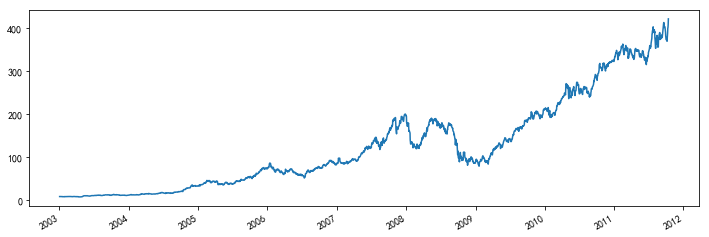

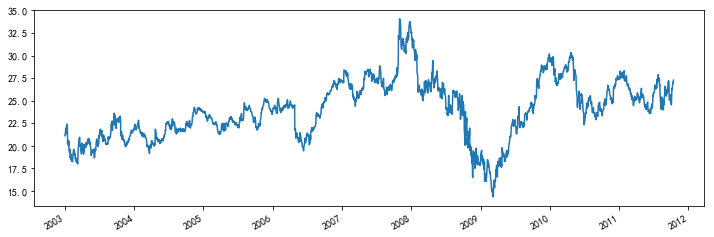

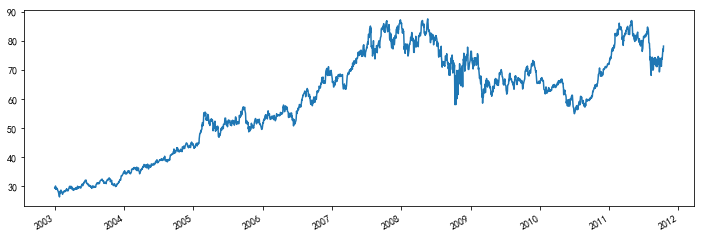

In [6]:
#时序图
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
for i in data.columns:
    data[i].plot()
    plt.show()

In [18]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
for i in data.columns:
    print(i)
    print( ADF(data[i]))
    print("\n")
#返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

AAPL
(1.5777198065520532, 0.9977891697734111, 10, 2203, {'1%': -3.4333218274973816, '5%': -2.8628528598160963, '10%': -2.5674688992643837}, 11344.462171852701)


MSFT
(-2.873086067530326, 0.04856843065105735, 23, 2190, {'1%': -3.43333948922474, '5%': -2.8628606583021843, '10%': -2.5674730514376263}, 2198.914894291746)


XOM
(-1.6504514582742922, 0.4568049864899511, 18, 2195, {'1%': -3.4333326714656223, '5%': -2.8628576479452597, '10%': -2.5674714486226202}, 6480.729901763713)




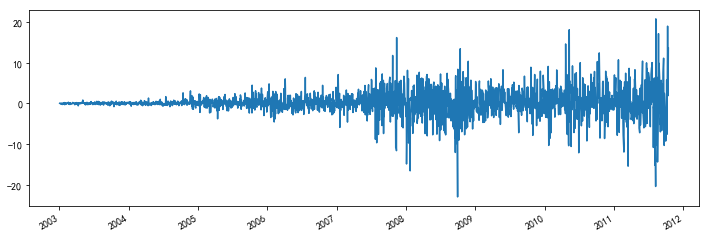

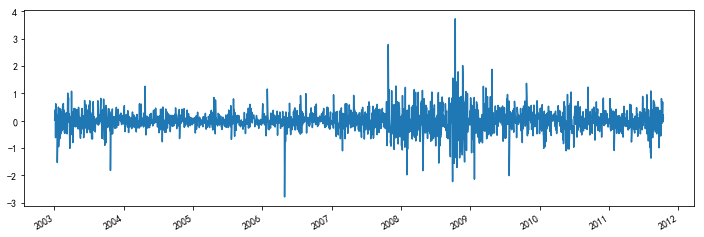

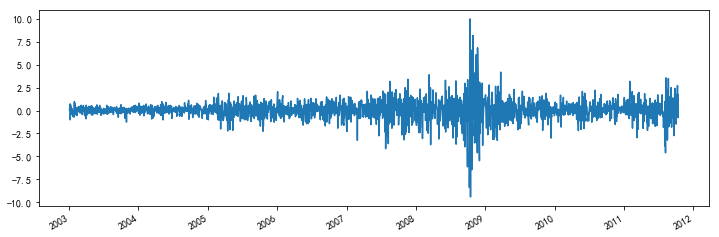

In [19]:
#差分
D_data = data.diff().dropna()
for i in D_data.columns:
    D_data[i].plot()#时序图
    plt.show()

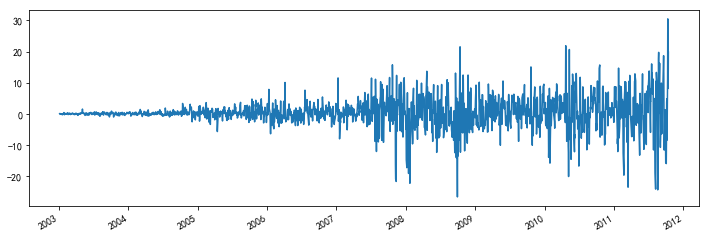

In [20]:
DD_aapl=data['AAPL'].diff(2).dropna()
DD_aapl.plot()
plt.show()

In [21]:
D_data=D_data.iloc[:,1:3]

#平稳性检验
for i in D_data.columns:
    print(i)
    print(ADF(D_data[i]))
    print("\n")

MSFT
(-9.35398278940142, 8.152500411317644e-16, 22, 2190, {'1%': -3.43333948922474, '5%': -2.8628606583021843, '10%': -2.5674730514376263}, 2205.3295297408695)


XOM
(-12.876845719942109, 4.749460656482826e-24, 17, 2195, {'1%': -3.4333326714656223, '5%': -2.8628576479452597, '10%': -2.5674714486226202}, 6479.252638344223)




In [17]:
ADF(DD_aapl)

(-8.610165557038139,
 6.508283604388273e-14,
 27,
 2184,
 {'1%': -3.4333477117905487,
  '10%': -2.5674749845110627,
  '5%': -2.8628642889373044},
 11404.457856613179)

In [24]:
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
for i in D_data.columns:
    print (acorr_ljungbox(D_data[i], lags=1)) #返回统计量和p值

print (acorr_ljungbox(DD_aapl, lags=1))
    

(array([11.5469]), array([0.0007]))
(array([57.4842]), array([0.]))
(array([606.0589]), array([0.]))


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site

BIC最小的p值和q值为：0、1


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D2.AAPL   No. Observations:                 2212
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -5730.922
Method:                       css-mle   S.D. of innovations              3.222
Date:                Thu, 21 Jun 2018   AIC                          11467.843
Time:                        14:55:05   BIC                          11484.948
Sample:                    01-06-2003   HQIC                         11474.092
                         - 10-14-2011                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      2.039      0.042    8.46e-06       0.000
ma.L1.D2.AAPL    -1.0000      0.001   -706.189      0.000      -1.003      -0.997
                                    Root

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to

BIC最小的p值和q值为：0、1
                             ARIMA Model Results                              
Dep. Variable:                 D.MSFT   No. Observations:                 2213
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1127.640
Method:                       css-mle   S.D. of innovations              0.403
Date:                Thu, 21 Jun 2018   AIC                           2261.280
Time:                        14:55:16   BIC                           2278.387
Sample:                    01-03-2003   HQIC                          2267.529
                         - 10-14-2011                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0028      0.008      0.351      0.726      -0.013       0.018
ma.L1.D.MSFT    -0.0752      0.021     -3.498      0.000      -0.117      -0.033
                           

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


BIC最小的p值和q值为：4、1
                             ARIMA Model Results                              
Dep. Variable:                  D.XOM   No. Observations:                 2213
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3267.339
Method:                       css-mle   S.D. of innovations              1.059
Date:                Thu, 21 Jun 2018   AIC                           6548.678
Time:                        14:55:29   BIC                           6588.593
Sample:                    01-03-2003   HQIC                          6563.259
                         - 10-14-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0219      0.018      1.214      0.225      -0.013       0.057
ar.L1.D.XOM    -1.0726      0.035    -30.534      0.000      -1.141      -1.004
ar.L2.D.XOM    -0.2843      0.0

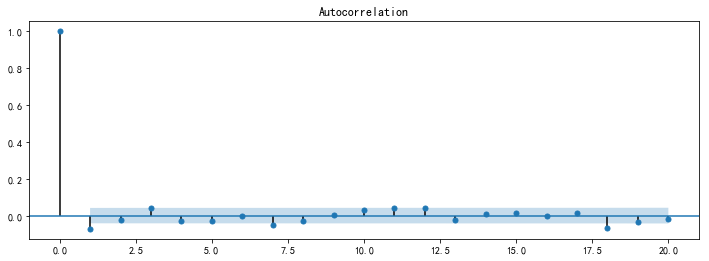

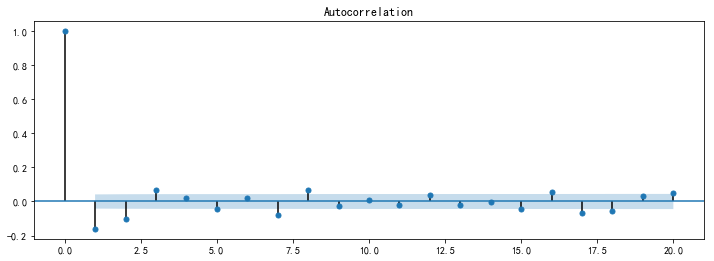

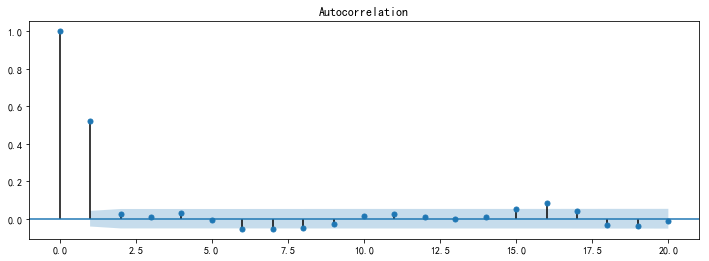

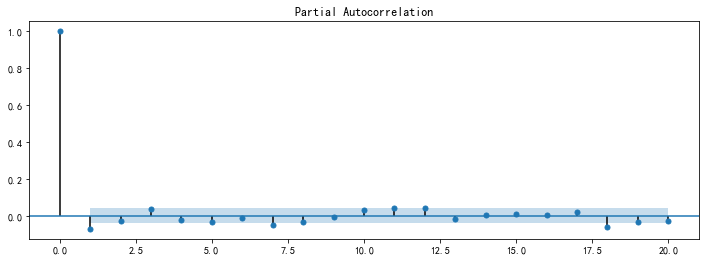

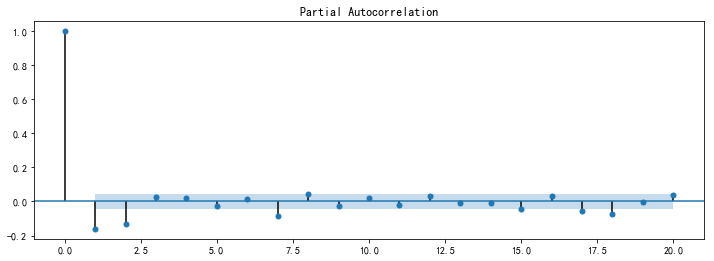

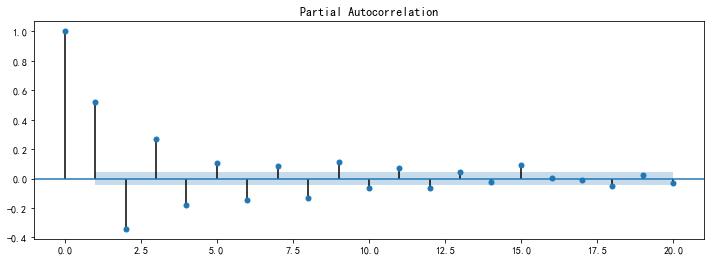

In [26]:
#自相关图
from statsmodels.graphics.tsaplots import plot_acf
for i in D_data.columns:
    plot_acf(D_data[i],lags=20).show()
    
plot_acf(DD_aapl,lags=20).show()
    
#偏自相关图
from statsmodels.graphics.tsaplots import plot_pacf
for i in D_data.columns:
    plot_pacf(D_data[i],lags=20).show()

plot_pacf(DD_aapl,lags=20).show()

#定阶
from statsmodels.tsa.arima_model import ARIMA
def setorder(data,d=1,pmax=5,qmax=5):
    bic_matrix = [] #bic矩阵
    for p in range(pmax+1):
        tmp = []
        for q in range(qmax+1):
            try: #存在部分报错，所以用try来跳过报错。
                tmp.append(ARIMA(data,(p,d,q)).fit(method='css').bic)
            except:
                tmp.append(None)
        bic_matrix.append(tmp)
    bic_matrix = pd.DataFrame(bic_matrix)
    return bic_matrix.stack().idxmin()  

#拟合模型
def fitmodel(data,d=1,pmax=5,qmax=5,prenum=5):
    p,q=setorder(data,d,pmax,qmax)
    print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
    model = ARIMA(data, (p,d,q)).fit() #建立ARIMA(0, 1, 1)模型
    print (model.summary()) #给出一份模型报告
    #作为期5天的预测，返回预测结果、标准误差、置信区间。
    pre,err,preinterval=model.forecast(prenum)
    print (u"未来5期的预测值:\n" ,pre)
    print (u"未来5期的预测值的误差:\n" ,err)
    print (u"未来5期的预测值的置信区间:\n" ,preinterval)
    
fitmodel(data['AAPL'],d=2)
fitmodel(data['MSFT'],d=1)
fitmodel(data['XOM'],d=1) 
    